Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking
using Optim, Turing, Flux.Tracker
gr(size=(600,300));

Turing.setadbackend(:reverse_diff)

loaded


┌ Warning: Package Turing does not have CmdStan in its dependencies:
│ - If you have Turing checked out for development and have
│   added CmdStan as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Turing
│ Loading CmdStan into Turing from project dependency, future warnings for Turing are suppressed.
└ @ nothing nothing:840


:reverse_diff

### snippet 2.8t

Define the data

In [2]:
k = 6; n = 9;

Define the model

In [3]:
@model globe_toss(n, k) = begin
  theta ~ Beta(1, 1) # prior
  k ~ Binomial(n, theta) # model
  return k, theta
end;

Compute the "maximum_a_posteriori" value

Set search bounds

In [4]:
lb = [0.0]; ub = [1.0];

Create (compile) the model

In [5]:
model = globe_toss(n, k);

Compute the maximum_a_posteriori

In [6]:
result = maximum_a_posteriori(model, lb, ub)

Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [0.7074651788576896]
 * Minimizer: [0.6666666666346246]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 1.36e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 2.91e-15 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 5.49e-10 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 40
 * Gradient Calls: 40

Use Turing mcmc

In [7]:
Turing.turnprogress(false)
chn = sample(model, NUTS(2000, 1000, 0.65));

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/Turing.jl:81
┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/samplers/support/hmc_core.jl:246
[NUTS{Turing.FluxTrackerAD,Union{}}] found initial ϵ: 1.6
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/samplers/support/hmc_core.jl:291
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/core/ad.jl:154
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/core/ad.jl:155
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/core/ad.jl:154
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/core/ad.jl:155
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/core/ad.jl:154
┌ Warning: grad = [NaN]
└ @ Turin

[NUTS] Finished with
  Running time        = 5.0150662429999855;
  #lf / sample        = 0.003;
  #evals / sample     = 6.861;
  pre-cond. metric    = [1.0].


Look at the generated draws (in chn)

In [8]:
describe(chn)

Iterations = 1:2000
Thinning interval = 1
Chains = 1
Samples per chain = 2000

Empirical Posterior Estimates:
              Mean          SD       Naive SE       MCSE         ESS   
  lf_num  0.0030000000 0.134164079 0.0030000000 0.0030000000 2000.00000
 elapsed  0.0025075331 0.076118594 0.0017020635 0.0021953340 1202.20989
 epsilon  1.1224381138 1.169459120 0.0261499009 0.0493105061  562.45939
   theta  0.6360030739 0.141416742 0.0031621745 0.0051225094  762.14241
      lp -3.3190592140 0.784351311 0.0175386285 0.0269713545  845.69885
eval_num  6.8610000000 4.105375263 0.0917989816 0.1380253600  884.68354
  lf_eps  1.1224381138 1.169459120 0.0261499009 0.0493105061  562.45939

Quantiles:
              2.5%           25.0%         50.0%        75.0%          97.5%    
  lf_num  0.00000000000  0.00000000000  0.000000000  0.0000000000  0.00000000000
 elapsed  0.00015128197  0.00015763575  0.000171609  0.0004108415  0.00092276617
 epsilon  0.37088676482  0.95783907916  0.957839079  1.0079

Look at the mean and sd

In [9]:
println("\ntheta = $(mean_and_std(chn[:theta][1001:2000]))\n")


theta = (0.6451384410698796, 0.1396889134652362)



Compute at hpd region

In [10]:
bnds = MCMCChain.hpd(chn[:theta], alpha=0.06);

analytical calculation

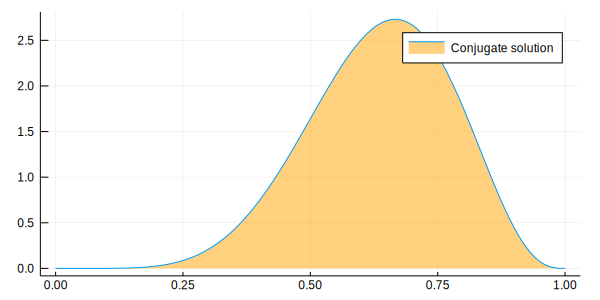

In [11]:
w = 6; n = 9; x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), fill=(0, .5,:orange), lab="Conjugate solution")

quadratic approximation

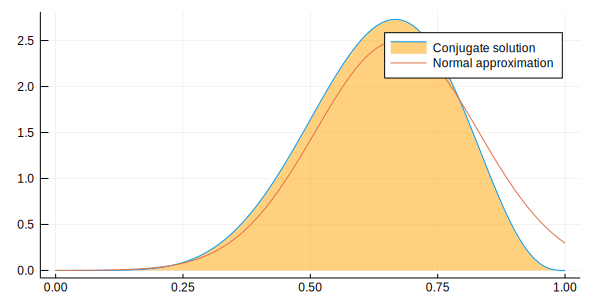

In [12]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

Turing Chain &  89%hpd region boundaries

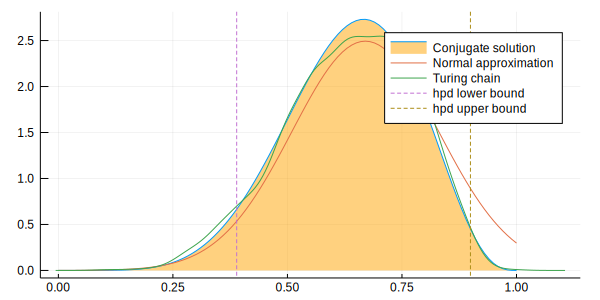

In [13]:
density!(chn[:theta], lab="Turing chain")
vline!([bnds[1]], line=:dash, lab="hpd lower bound")
vline!([bnds[2]], line=:dash, lab="hpd upper bound")

Show hpd region

In [14]:
println("hpd bounds = $bnds\n")

hpd bounds = [0.38923, 0.899449]



End of `clip_08t.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*